<a href="https://colab.research.google.com/github/AR-Karthik/ETG-MachineLearningCourse/blob/main/KNearestNeighbor/Project_Heart_Disease_Prediction_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset

##Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#Attribute Information
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

#Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In [3]:
!pip install dash

In [29]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import dash
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
%matplotlib inline
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [12]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Sex'].value_counts().values.tolist(), 
                      x = df['Sex'].value_counts().index, 
                      text=df['Sex'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Sex'].value_counts().keys(),
                             values=df['Sex'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "Gender Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [13]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ChestPainType'].value_counts().values.tolist(), 
                      x = df['ChestPainType'].value_counts().index, 
                      text=df['ChestPainType'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ChestPainType'].value_counts().keys(),
                             values=df['ChestPainType'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,530])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "ChestPainType Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [14]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['RestingECG'].value_counts().values.tolist(), 
                      x = df['RestingECG'].value_counts().index, 
                      text=df['RestingECG'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['RestingECG'].value_counts().keys(),
                             values=df['RestingECG'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "RestingECG Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [15]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ExerciseAngina'].value_counts().values.tolist(), 
                      x = df['ExerciseAngina'].value_counts().index, 
                      text=df['ExerciseAngina'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ExerciseAngina'].value_counts().keys(),
                             values=df['ExerciseAngina'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "ExerciseAngina Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [16]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ST_Slope'].value_counts().values.tolist(), 
                      x = df['ST_Slope'].value_counts().index, 
                      text=df['ST_Slope'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ST_Slope'].value_counts().keys(),
                             values=df['ST_Slope'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,500])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "ST_Slope Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [17]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['HeartDisease'].value_counts().values.tolist(), 
                      x = df['HeartDisease'].value_counts().index, 
                      text=df['HeartDisease'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['HeartDisease'].value_counts().keys(),
                             values=df['HeartDisease'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,550])
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "HeartDisease Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [18]:
# Using facet_row and or facet_col arguments to create Sub plots
fig = px.scatter(df, 
                 x=df.Age, 
                 y=df.Cholesterol, 
                 color=df.HeartDisease, 
                 facet_col=df.FastingBS,
                 facet_row=df.Sex,
                 color_discrete_map={1: "#FF5722",0: "#7CB342"},
                 width=950, 
                 height=800,
                 title="HeartDisease Data")

fig.update_layout(
                    plot_bgcolor= "#dcedc1",
                    paper_bgcolor="#FFFDE7",
                 )


fig.show()
#po.plot(fig)

In [19]:
cat = ['Sex', 'ChestPainType','FastingBS','RestingECG',
                          'ExerciseAngina',  'ST_Slope','HeartDisease']
num = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

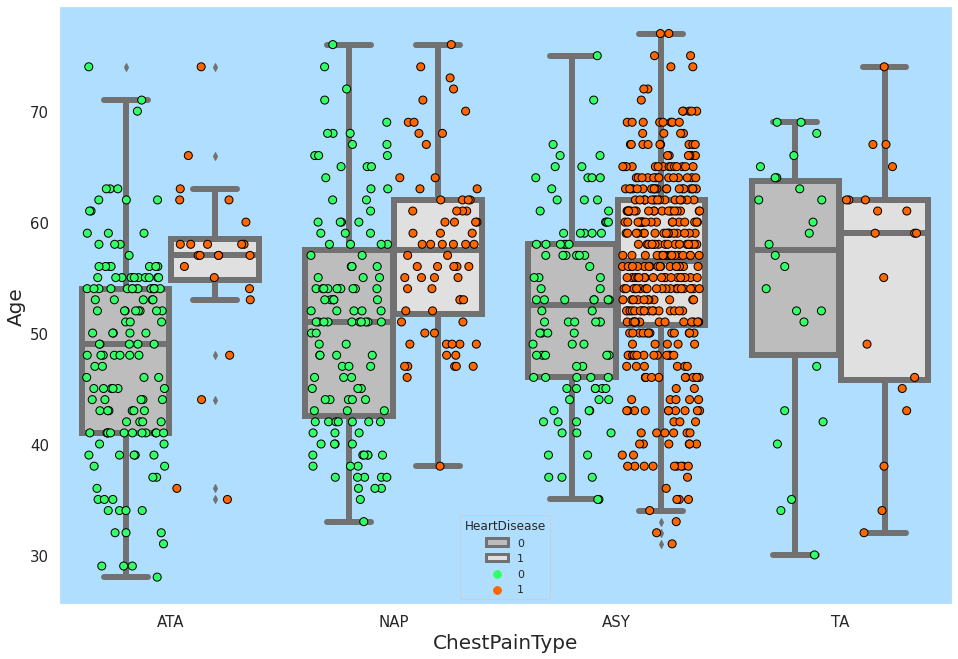

In [21]:
import seaborn as sns
plt.figure(figsize=(16,11))
sns.set(rc={"axes.facecolor":"#b0deff","axes.grid":False,
            'xtick.labelsize':15,'ytick.labelsize':15,
            'axes.labelsize':20,'figure.figsize':(20.0, 9.0)})
params = dict(data=df ,x = df.ChestPainType,y = df.Age ,hue=df.HeartDisease,dodge=True)
sns.stripplot(**params , size=8,jitter=0.35,palette=['#33FF66','#FF6600'],edgecolor='black',linewidth=1)
sns.boxplot(**params ,palette=['#BDBDBD','#E0E0E0'],linewidth=6)
plt.show()

In [22]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in num:
    count_outliers(df,i)

No outliers in Age
There are outliers in RestingBP
Count of outliers are: 28
There are outliers in Cholesterol
Count of outliers are: 183
There are outliers in MaxHR
Count of outliers are: 2
There are outliers in Oldpeak
Count of outliers are: 16


In [23]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()

In [24]:
LABEL_ENCODING("Sex")
LABEL_ENCODING("ChestPainType")
LABEL_ENCODING("RestingECG")
LABEL_ENCODING("ExerciseAngina")
LABEL_ENCODING("ST_Slope")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [25]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [26]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114


In [27]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#K Nearest Neighbour Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset. KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.

In [32]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

#How does KNN Algorithm Work:

The K-NN working can be explained on the basis of the below algorithm:
* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.

In [33]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [34]:
print(confusion_matrix(y_test,pred))

[[105  21]
 [ 21 129]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.86      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [36]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

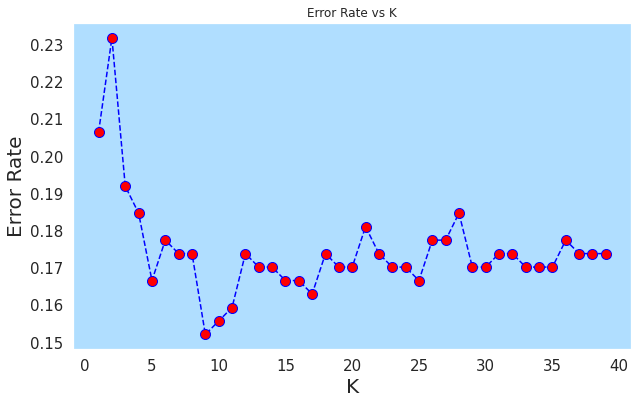

In [37]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8478260869565217


#Advantages

* Very simple
* Training is trivial
* Works with any number of classes
* Easy to add more data
* Few parameters
** K
** Distance Metric


#Disadvantages

* High Prediction Cost (worse for large data sets)
* Not good with high dimensional data
* Categorical Features don’t work well